# Lag Analysis
The simplest model for deaths is total cases *N* days ago. This fits the data very well although a more complicated model would give better results. The benefit of this is that *N* provides some insight into how fatal the virus is. A bigger *N* implies lower mortality although there's a strong caveat in any of these analyses that testing has a huge impact on the case fatality rate (cfr) - the more asymptomatic people are tested the lower the cfr. Also note that strictly speaking the cfr should only be computed on resolved cases (fatality or cured) but that here we count all known cases on the one hand is a bit optimistic since some of those infected people will die but also pessimistic because of the large number of undiagnosed cases in the general population. Furthermore as we saw in Italy, COVID deaths may not be reported as such if the patient died before ever being tested or if the death was attributed to some other factor even though COVID was a contributor.

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib as plt

In [2]:
try:
    # read directly from NYT's github repo for the freshest data
    states = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')
    counties = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv')
except:
    # unless it's not available in which case read locally after pulling the repo from upstream
    # (assumes you've added the NYT repo as upstream with 
    #     $ remote add upstream https://github.com/nytimes/covid-19-data.git)
    !git pull upstream master
    states = pd.read_csv('us-states.csv')
    counties = pd.read_csv('us-counties.csv')

In [3]:
def state_lag(state,lag):
    state_by_day = states[states.state==state].groupby('date').agg({'cases': 'sum','deaths': 'sum'})
    state_by_day['lag'] = state_by_day['cases'].shift(lag)
    state_by_day[['deaths','lag']].plot(figsize=(6,6),title='{0} {1} day lag'.format(state,lag))
    plt.pyplot.xticks(rotation=45)

In [4]:
def national_lag(lag):
    df_by_day = states.groupby('date').agg({'cases': 'sum','deaths': 'sum'})
    df_by_day['lag'] = df_by_day['cases'].shift(lag)
    df_by_day[['deaths','lag']].plot(figsize=(6,6),title='National {0} day lag'.format(lag))
    plt.pyplot.xticks(rotation=45)

With the above functions defined we can quickly compare any particular lag interval on cases with the reported deaths for the same area.

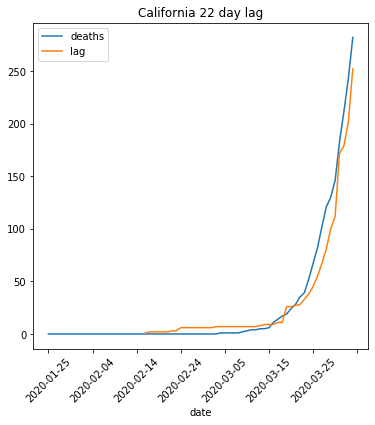

In [5]:
state_lag('California',22)

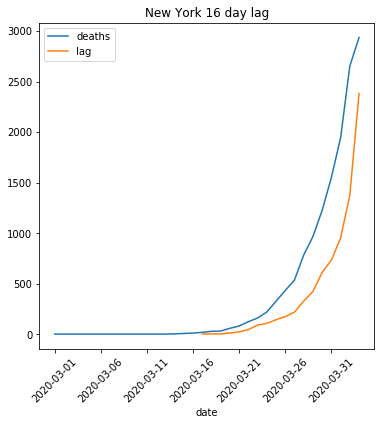

In [6]:
state_lag('New York',16)

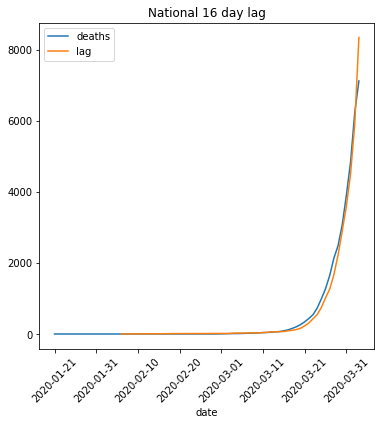

In [7]:
national_lag(16)